<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_Numpy_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EA%B3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상 처리

In [1]:
import cv2  #OpenCV 라이브러리를 사용하기 위한 구문
from google.colab.patches import cv2_imshow  #코랩에서 시각화를 위해 필요한 구문

In [2]:
cv2.__version__

'4.1.2'

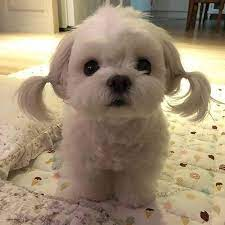

In [5]:
path = '/content/drive/MyDrive/module/dog.jpg'
image = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(image)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print(type(image))

<class 'numpy.ndarray'>


In [7]:
print(image.shape)  #(세로, 가로, RGB)

(225, 225, 3)


# 빈 이미지 만들어서 작업하기

In [8]:
import numpy as np
image = np.zeros((28, 28, 3), np.uint8)  #uint는 음수X (0~256)

In [9]:
cv2_imshow(image)

In [10]:
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
image[:, :, 0] = 255
print(image)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [12]:
image[:, :, 2] = 255
cv2_imshow(image)

In [13]:
from tensorflow import keras

In [14]:
data = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [15]:
train_data, test_data = data #학습터 데이터와 평가용 데이터
print(type(train_data))
print(len(train_data))

<class 'tuple'>
2


In [16]:
image_train, label_train = train_data #이미지 데이터와 정답 데이터
print(image_train.shape)
print(label_train.shape)

(60000, 28, 28)
(60000,)


In [18]:
image = image_train[0] #영상처리 라이브러리를 통해 손글씨 이미지를 직접 볼 수 있음
cv2_imshow(image)

In [19]:
label = label_train[0]
print(label)

5


# 비슷한 데이터의 평균으로 예측하기

In [25]:
from tensorflow import keras
data = keras.datasets.mnist.load_data() #손글씨 데이터를 로딩
train_data, test_data = data #학습데이터와 평가데이터
image_train, label_train = train_data #학습이미지와 정답
image_test, label_test = test_data #평가이미지와 정답

print(image_train.shape, label_train.shape)
image_train2 = image_train.reshape(60000, -1)
print(image_train2.shape)
image_test2 = image_test.reshape(10000, -1)

(60000, 28, 28) (60000,)
(60000, 784)


In [27]:
_# 2차원으로 표현된 값(점)과 인접한 값들의 평균을 모아서 예측하기

from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier() #모델 생성
model.fit(image_train2, label_train) #학습(독립변수, 종속변수) y = w1x1 + w2x2 + b (w1,w2:가중치)

KNeighborsClassifier()

In [30]:
pred_value = model.predict(image_test2) #예측해 보세요

In [31]:
correct = 0
for i in range(len(pred_value)):
  if pred_value[i] == label_test[i]:
    correct += 1
print(correct,"/",len(pred_value))

9688 / 10000


# 러프하게

동전을 100번 던졌을 때 앞면이 나올 확률이 1/2라고 가정하자.  
동전을 100번 던졌을 때 앞면이 몇 번 나오는지 테스트를 만 번 수행하여 수행 결과를 배열로 만드시오.

In [32]:
import random

In [50]:
#전제조건: 동전을 던졌을 때, 앞면이 나올 확률 1/2
#test_n() : 동전을 100번 던져서 앞면이 나온 횟수를 반환
def test_n(n=100):
  cnt = 0
  for i in range(n):
    if random.randrange(0,2) == 1: #앞면이 나오면 cnt 1증가
      cnt += 1
  return cnt

In [51]:
na = np.zeros(100) #앞면이 몇 번 나왔는지 기록할 배열
for i in range(100000): #100번씩 던지는 것을 1000번 실행
  na[test_n()] += 1 #실험해서 앞면이 나온 원소 값을 1 증가 ex. 40번 나오면 인덱스 40번째 값을 +1
print(na)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e+00 1.100e+01 1.200e+01 2.000e+01 4.400e+01
 8.000e+01 1.410e+02 2.810e+02 4.350e+02 7.610e+02 1.082e+03 1.543e+03
 2.215e+03 3.049e+03 3.883e+03 4.796e+03 5.744e+03 6.650e+03 7.329e+03
 7.768e+03 8.047e+03 7.779e+03 7.388e+03 6.510e+03 5.943e+03 4.907e+03
 3.852e+03 2.951e+03 2.256e+03 1.651e+03 1.116e+03 7.220e+02 4.560e+02
 2.580e+02 1.440e+02 8.400e+01 5.700e+01 1.500e+01 1.100e+01 4.000e+00
 2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000

In [46]:
import matplotlib.pyplot as plt

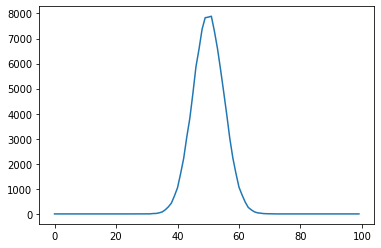

In [47]:
plt.plot(na)
#정규분포도

#통계와 확률을 통한 검증
# 67번 이상 앞면이 나온 동전이 있을 수 있지만 현재 데이터에서는 0개
# -> 해당 동전은 공정하지 않음

#문제1
어느 카지노에서 동전을 100번 던져서 몇 번 나오는지 배팅하는 게임이 있다.  

홍길동이 카지노에 가서 67번 나오는 것에 배팅을 하였는데, 대박을 맞았다.  

대박을 맞을 확률은?  

해당 카지노의 동전은 앞면이 나올 확률이 1/2라고 말할 수 있는지 검정하시오.

In [55]:
nac = np.cumsum(na)
print(nac[33]*2/100000*100,"%") #홍길동이 대박날 확률 = 0.00094 = 0.094%
#해당 카지노의 동전은 공정하지 않다.

# 앞면이 67번 나올 확률 = 뒷면이 33번 나올 확률 이므로 양쪽 확률 모두 구해줘야 함

0.09 %


In [56]:
print("평균:",np.mean(na),"표준편차:",np.std(na))

평균: 1000.0 표준편차: 2151.8449758288816


In [57]:
#정규분포를 표준 정규분포로 전환 (=스케일 조정)

na2 = na-np.mean(na) #수평이동으로 평균을 0으로 맞추고
print("평균:",np.mean(na2),"표준편차:",np.std(na2))
na3 = na2/np.std(na2)  #표준편차로 나눠서 분산을 1로 맞춘다 -> 지금은 오차 존재...
print("평균:",np.mean(na3),"표준편차:",np.std(na3))

평균: 0.0 표준편차: 2151.8449758288816
평균: 2.4424906541753444e-17 표준편차: 1.0


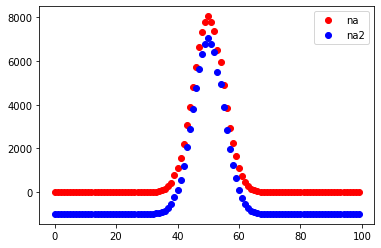

In [59]:
plt.plot(na, 'ro', label='na') #기존 10만번 던진 분포
plt.plot(na2, 'bo', label='na2')
plt.legend()
plt.show()

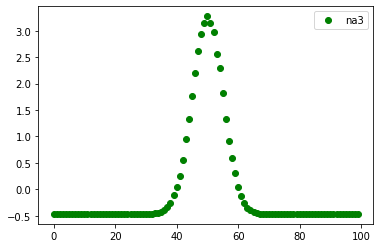

In [58]:
plt.plot(na3,'go',label='na3') #정규화된 분포 (평균=0, 분산=1)
plt.legend()
plt.show()